In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns ; sns.set()

%matplotlib inline

df = pd.read_csv('eda_cleaned_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,max_salary,avg_salary,city,state,same_state,company_age,job_tag,job_level,num_competitors,region
0,Data Scientist,70-116,"Secure our Nation, Ignite your Future\r\n\r\nJ...",4.2,ManTech,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,116,93.0,Chantilly,VA,0,52,data scientist,NaN,0,SouthEast
1,Data Scientist,70-116,"VA Boston Healthcare System\r\nBoston, Massach...",3.6,VA Boston Healthcare System,"Boston, MA","Boston, MA",201 to 500 employees,-1,Hospital,...,116,93.0,Boston,MA,1,-1,data scientist,NaN,0,NorthEast
2,Data & Analytics Consultant,70-116,WHO WE LOOK FOR\r\n\r\nAn SEI Consultant is a ...,4.6,SEI,"Cincinnati, OH","Cincinnati, OH",201 to 500 employees,1992,Company - Private,...,116,93.0,Cincinnati,OH,1,28,other,NaN,0,MidWest
3,R&D Scientist,70-116,"Since 2001, Hygiena has been on a mission to b...",3.9,Hygiena,"New Castle, DE","Camarillo, CA",201 to 500 employees,-1,Company - Private,...,116,93.0,New Castle,DE,0,-1,other,NaN,2,NorthEast
4,Data Scientist,70-116,Why We Work at Dun & Bradstreet\r\n\r\n\r\nWe ...,3.1,Dun & Bradstreet,"Austin, TX","Short Hills, NJ",1001 to 5000 employees,1841,Company - Private,...,116,93.0,Austin,TX,0,179,data scientist,NaN,2,SouthWest


In [2]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'min_salary', 'max_salary', 'avg_salary', 'city', 'state',
       'same_state', 'company_age', 'job_tag', 'job_level', 'num_competitors',
       'region'],
      dtype='object')

In [3]:
# interested categories 

cat = ['job_tag', 'job_level', 'state', 'Size', 'Industry', 'Sector', 'Type of ownership', 'Rating', 'Revenue', 'avg_salary', 'company_age', 'num_competitors', 'region']

model_df = df[cat]
print(model_df.shape)
model_df.head()

(300, 13)


,job_tag,job_level,state,Size,Industry,Sector,Type of ownership,Rating,Revenue,avg_salary,company_age,num_competitors,region
0,data scientist,NaN,VA,5001 to 10000 employees,Research & Development,Business Services,Company - Public,4.2,$1 to $2 billion (USD),93.0,52,0,SouthEast
1,data scientist,NaN,MA,201 to 500 employees,Health Care Services & Hospitals,Health Care,Hospital,3.6,Unknown / Non-Applicable,93.0,-1,0,NorthEast
2,other,NaN,OH,201 to 500 employees,Consulting,Business Services,Company - Private,4.6,$50 to $100 million (USD),93.0,28,0,MidWest
3,other,NaN,DE,201 to 500 employees,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,Company - Private,3.9,$100 to $500 million (USD),93.0,-1,2,NorthEast
4,data scientist,NaN,TX,1001 to 5000 employees,IT Services,Information Technology,Company - Private,3.1,$1 to $2 billion (USD),93.0,179,2,SouthWest


In [4]:
per_missing = (round((model_df.isna().sum()/model_df.shape[0]) * 100,2).to_frame(name = '% of missing values'))

print(per_missing)
for index, row in per_missing.iterrows():
    if row[0] > 50:
#         print('yes')
        model_df.drop(labels=index, inplace=True, axis=1)
    else:
#         pass
        model_df.fillna('Unknown', inplace=True)
    
model_df.isna().sum()

                   % of missing values
job_tag                           0.00
job_level                        76.33
state                             4.33
Size                              0.00
Industry                          0.00
Sector                            0.00
Type of ownership                 0.00
Rating                            0.00
Revenue                           0.00
avg_salary                        0.00
company_age                       0.00
num_competitors                   0.00
region                            4.67


C:\Users\Ekene\anaconda3\lib\site-packages\pandas\core\frame.py:4147: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(
C:\Users\Ekene\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


job_tag              0
state                0
Size                 0
Industry             0
Sector               0
Type of ownership    0
Rating               0
Revenue              0
avg_salary           0
company_age          0
num_competitors      0
region               0
dtype: int64

In [5]:
model_df.region.unique()

array(['SouthEast', 'NorthEast', 'MidWest', 'SouthWest', 'West',
       'Unknown'], dtype=object)

C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


ls: -21.858040 (9.093582)


C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


dt: -26.729028 (8.218397)


C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


rf: -23.492716 (9.730504)


[Text(0, 0, 'ls'), Text(0, 0, 'dt'), Text(0, 0, 'rf')]

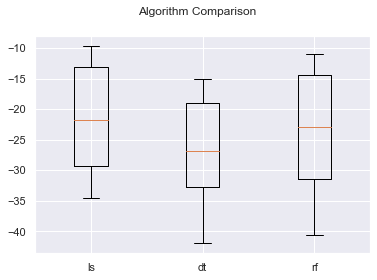

In [24]:
# linearregression
# decision tree
# Random Forrest


from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression


models = []


# models.append(('lr', LinearRegression()))
models.append(('ls', Lasso()))
# models.append(('LR', LogisticRegression()))
models.append(('dt', DecisionTreeRegressor()))
# models.append(('KNN', KNeighborsClassifier()))
# models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# models.append(('ohe', OneHotEncoder(sparse=False)))
models.append(('rf', RandomForestRegressor()))

model_df = pd.get_dummies(model_df)
X = model_df.drop('avg_salary', axis = 1)
y = model_df['avg_salary']


results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state = 42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring ='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# lr.fit(X_train, y_train)
# dt.fit(X_train, y_train)



In [7]:
cross_val_score(dt, X_train, y_train, scoring = 'neg_mean_absolute_error', cv=5)

array([-19.23837209, -23.95348837, -22.30813953, -25.59302326,
       -26.6627907 ])

In [46]:
# lr = LinearRegression()
ls = Lasso()
# lr = LogisticRegression()
dt = DecisionTreeRegressor()
# knn = KNeighborsClassifier()
# nb = GaussianNB()
# svm = SVC()
rf = RandomForestRegressor()

models = [ls, dt, rf]
results= []
predictions = []
for model in models:
    kfold = KFold(n_splits=10, random_state = 42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring ='neg_mean_absolute_error')
    results.append(cv_results.mean())
    
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    predictions.append(pred)
    
mse = []
for model, score, pred in zip(models, results, pred):
    mse = (mean_absolute_error(y_test, pred))
    print(model, score, mse)  
from sklearn.metrics import mean_absolute_error

C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Users\Ekene\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


TypeError: Singleton array 96.165 cannot be considered a valid collection.